In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import boto3
import pandas as pd
import os.path
from os import path

s3 = boto3.resource('s3')
s3_client = boto3.client('s3')

def download(bucket, data_key):
    if path.exists(data_key):
        print('File '+data_key+' existed.')
        return False
    else:
        s3.Object(bucket, data_key).download_file(data_key)
        print('File '+data_key+' downloaded.')
        return True

bucket = 'wp-dw-sandbox'
url_prefix = 'yuy/tmp_yuy_30_mins_comments_dataset_v1/'

In [2]:
# download the data
!mkdir $url_prefix
for obj in s3_client.list_objects(Bucket = bucket, Prefix = url_prefix)['Contents']:
#     filename, file_extension = os.path.splitext(obj['Key'])
    data_key = obj['Key']
    download(bucket, data_key)

mkdir: cannot create directory ‘yuy/tmp_yuy_30_mins_comments_dataset_v1/’: File exists
File yuy/tmp_yuy_30_mins_comments_dataset_v1/000000_0 existed.
File yuy/tmp_yuy_30_mins_comments_dataset_v1/000001_0 existed.
File yuy/tmp_yuy_30_mins_comments_dataset_v1/000002_0 existed.
File yuy/tmp_yuy_30_mins_comments_dataset_v1/000003_0 existed.
File yuy/tmp_yuy_30_mins_comments_dataset_v1/000004_0 existed.
File yuy/tmp_yuy_30_mins_comments_dataset_v1/000005_0 existed.
File yuy/tmp_yuy_30_mins_comments_dataset_v1/000006_0 existed.
File yuy/tmp_yuy_30_mins_comments_dataset_v1/000007_0 existed.
File yuy/tmp_yuy_30_mins_comments_dataset_v1/000008_0 existed.
File yuy/tmp_yuy_30_mins_comments_dataset_v1/000009_0 existed.


In [3]:
# load the data
import dask.dataframe as dd
names = ['action_counts_dontagree_sum', 'action_counts_flag_banned_word_sum', 'action_counts_flag_body_count_sum', 'action_counts_flag_comment_noagree_sum', 'action_counts_flag_comment_offensive_sum', 'action_counts_flag_comment_other_sum', 'action_counts_flag_matched_suspect_word_filter_sum', 'action_counts_flag_suspect_word', 'action_counts_flag_trust', 'action_counts_like', 'thread_created_at', '30_min_reply_count', 'root_id', 'level_sum', 'thread_reply_count', 'polarity_scores_compound_sum', 'polarity_scores_neg_sum', 'polarity_scores_neu_sum', 'polarity_scores_pos_sum', 'readability_flesch_kincaid_grade_sum', 'readability_gunning_fog_sum', 'readability_automated_readability_index_sum', 'readability_coleman_liau_index_sum', 'readability_sentence_count_sum', 'readability_lexicon_count_sum', 'readability_char_count_sum', 'readability_sentence_avg_length_sum', 'readability_lexicon_avg_length_sum', 'last_created_at_day_of_week', 'last_created_at_hour_of_day']
df = dd.read_csv(url_prefix+'*', sep='\01', header=None, names=names)
df = df.compute()

In [4]:
# remove unused columns
df =  df.drop(['thread_created_at', 'root_id'], axis=1)
# extract target values
y = df.pop('thread_reply_count').values

In [5]:
# feature expansion
df['action_counts_dontagree_sum_mean'] = df['action_counts_dontagree_sum'] / df['30_min_reply_count']
df['action_counts_flag_banned_word_sum_mean'] = df['action_counts_flag_banned_word_sum'] / df['30_min_reply_count']
df['action_counts_flag_body_count_sum_mean'] = df['action_counts_flag_body_count_sum'] / df['30_min_reply_count']
df['action_counts_flag_comment_noagree_sum_mean'] = df['action_counts_flag_comment_noagree_sum'] / df['30_min_reply_count']
df['action_counts_flag_comment_offensive_sum_mean'] = df['action_counts_flag_comment_offensive_sum'] / df['30_min_reply_count']
df['action_counts_flag_comment_other_sum_mean'] = df['action_counts_flag_comment_other_sum'] / df['30_min_reply_count']
df['action_counts_flag_matched_suspect_word_filter_sum_mean'] = df['action_counts_flag_matched_suspect_word_filter_sum'] / df['30_min_reply_count']
df['action_counts_flag_suspect_word_mean'] = df['action_counts_flag_suspect_word'] / df['30_min_reply_count']
df['action_counts_flag_trust_mean'] = df['action_counts_flag_trust'] / df['30_min_reply_count']
df['action_counts_like_mean'] = df['action_counts_like'] / df['30_min_reply_count']
df['level_sum_mean'] = df['level_sum'] / df['30_min_reply_count']
df['polarity_scores_compound_sum_mean'] = df['polarity_scores_compound_sum'] / df['30_min_reply_count']
df['polarity_scores_neg_sum_mean'] = df['polarity_scores_neg_sum'] / df['30_min_reply_count']
df['polarity_scores_neu_sum_mean'] = df['polarity_scores_neu_sum'] / df['30_min_reply_count']
df['polarity_scores_pos_sum_mean'] = df['polarity_scores_pos_sum'] / df['30_min_reply_count']
df['readability_flesch_kincaid_grade_sum_mean'] = df['readability_flesch_kincaid_grade_sum'] / df['30_min_reply_count']
df['readability_gunning_fog_sum_mean'] = df['readability_gunning_fog_sum'] / df['30_min_reply_count']
df['readability_automated_readability_index_sum_mean'] = df['readability_automated_readability_index_sum'] / df['30_min_reply_count']
df['readability_coleman_liau_index_sum_mean'] = df['readability_coleman_liau_index_sum'] / df['30_min_reply_count']
df['readability_sentence_count_sum_mean'] = df['readability_sentence_count_sum'] / df['30_min_reply_count']
df['readability_lexicon_count_sum_mean'] = df['readability_lexicon_count_sum'] / df['30_min_reply_count']
df['readability_char_count_sum_mean'] = df['readability_char_count_sum'] / df['30_min_reply_count']
df['readability_sentence_avg_length_sum_mean'] = df['readability_sentence_avg_length_sum'] / df['30_min_reply_count']
df['readability_lexicon_avg_length_sum_mean'] = df['readability_lexicon_avg_length_sum'] / df['30_min_reply_count']
# one-hot encoding
columnsToEncode = pd.Series(['last_created_at_day_of_week', 'last_created_at_hour_of_day'])
X = pd.get_dummies(df, columns=columnsToEncode, drop_first=True)
X_header = list(X.columns.values)
X = X.to_numpy()

In [6]:
# data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [7]:
# fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [8]:
# predict on test set
y_pred = model.predict(X_test)
# R2 metric
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6937422285759132

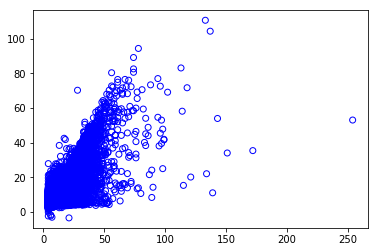

In [10]:
# perfomance plot
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, facecolors='none', color='blue');
plt.show()

In [14]:
weights = model.coef_
top_n = 10
important_features = pd.Series(weights).sort_values(ascending=False).index[0:top_n]

for f in important_features:
    print(X_header[f], weights[f])

polarity_scores_neg_sum_mean 1.6815345795054897
action_counts_dontagree_sum_mean 1.5615853697339714
30_min_reply_count 1.2340875859587013
polarity_scores_neu_sum_mean 1.1907524243142256
action_counts_flag_comment_noagree_sum_mean 1.0445776644392677
action_counts_flag_comment_other_sum_mean 0.7527395942025493
action_counts_flag_trust_mean 0.677230305827133
action_counts_flag_comment_offensive_sum_mean 0.6293767419162288
last_created_at_hour_of_day_8 0.5131291420475876
action_counts_flag_matched_suspect_word_filter_sum 0.502984915842293


In [15]:
# rescale the target values
k = 40
y_test_scaled = [1 if i >= k else i/k for i in y_test]
y_train_scaled = [1 if i >= k else i/k for i in y_train]

In [16]:
# fit the model
model2 = LinearRegression().fit(X_train, y_train_scaled)

In [17]:
y_pred_scaled = model2.predict(X_test)
# R2 metric
r2_score(y_test_scaled, y_pred_scaled)

0.7011237184755781

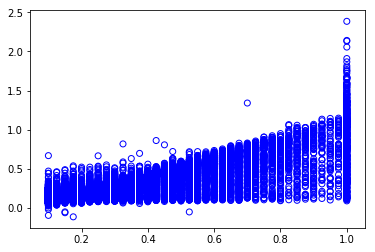

In [18]:
# perfomance plot
plt.scatter(y_test_scaled, y_pred_scaled, facecolors='none', color='blue');
plt.show()

In [19]:
weights2 = model2.coef_
important_features = pd.Series(weights2).sort_values(ascending=False).index[0:top_n]

for f in important_features:
    print(X_header[f], weights[f])

action_counts_dontagree_sum_mean 1.5615853697339714
30_min_reply_count 1.2340875859587013
action_counts_flag_comment_noagree_sum_mean 1.0445776644392677
action_counts_flag_comment_other_sum_mean 0.7527395942025493
action_counts_flag_trust_mean 0.677230305827133
polarity_scores_neg_sum_mean 1.6815345795054897
action_counts_flag_comment_offensive_sum_mean 0.6293767419162288
last_created_at_hour_of_day_8 0.5131291420475876
last_created_at_hour_of_day_9 0.4735085154772842
last_created_at_hour_of_day_7 0.45017599864778735
